
STAR QUESTION: PREDICTING INDEX PRICE FOR NEW INTEREST RATE SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy as sns
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

In [3]:
df=pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


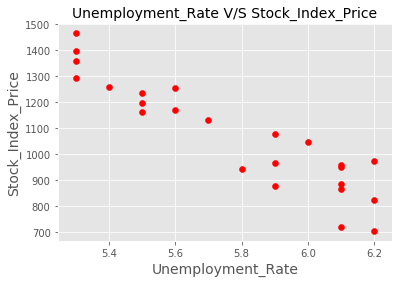

In [4]:
style.use('ggplot')
plt.scatter(df['Unemployment_Rate'],df['Stock_Index_Price'],color='r')
plt.title('Unemployment_Rate V/S Stock_Index_Price',fontsize=14)
plt.xlabel('Unemployment_Rate',fontsize=14)
plt.ylabel('Stock_Index_Price',fontsize=14)
plt.grid(True)
plt.show()

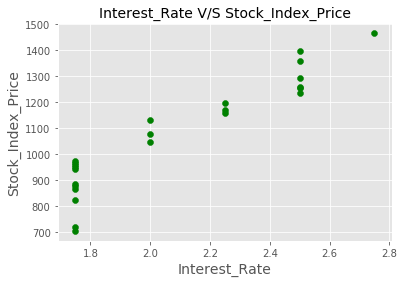

In [5]:
style.use('ggplot')
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'],color='g')
plt.title('Interest_Rate V/S Stock_Index_Price',fontsize=14)
plt.xlabel('Interest_Rate',fontsize=14)
plt.ylabel('Stock_Index_Price',fontsize=14)
plt.grid(True)
plt.show()

In [6]:
from sklearn import linear_model
X=df[['Interest_Rate','Unemployment_Rate']]
X.head()

,Interest_Rate,Unemployment_Rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [7]:
Y=df['Stock_Index_Price']
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: Stock_Index_Price, dtype: int64

In [8]:
reg=linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Intercept=',reg.intercept_)
print('Coefficients=',reg.coef_)

Intercept= 1798.403977625855
Coefficients= [ 345.54008701 -250.14657137]


In [10]:
New_Interest_Rate=2.75
New_Unemployment_Rate=5.3

In [11]:
print('Predicted Stock Index Price: ', reg.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price:  [1422.86238865]


In [ ]:
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
window=Tk()
window.title('Predicted Stock Index Price')
canvas1 = Canvas(window,width=500,height=300)
canvas1.pack()

intercept_result=('Intercept=',reg.intercept_)
intercept_label=Label(window,text=intercept_result,justify='center')
canvas1.create_window(260,220,window=intercept_label)

coefficient_result=('Coefficient=',reg.coef_)
coefficient_label=Label(window,text=coefficient_result,justify='center')
canvas1.create_window(260,240,window=coefficient_label)

#LABELS
interest_label=Label(window,text='Type Interest rate: ')
canvas1.create_window(100,100,window=interest_label)
unemployment_label=Label(window,text='Type Unemployment rate: ')
canvas1.create_window(120,120,window=unemployment_label)

#ENTRYS
interest_entry=Entry(window)
canvas1.create_window(400,100,window=interest_entry)
unemployement_entry=Entry(window)
canvas1.create_window(400,120,window=unemployement_entry)

def values():
    new_interest_rate=float(interest_entry.get())
    new_unemployment_rate=float(unemployement_entry.get())
    Prediction_result=('Predicted Stock Index Price: ', reg.predict([[new_interest_rate ,new_unemployment_rate]]))
    Prediction_label=Label(window,text=Prediction_result,bg='red')
    canvas1.create_window(260,280,window=Prediction_label)
    
button=Button(window,text='Predicted Stock Index Price',command=values,font=('comic sans ms',10,'bold' ),bg='black',fg='red',relief=GROOVE)
canvas1.create_window(400,150,window=button)

figure1=plt.Figure(figsize=(7,5))
grp1=figure1.add_subplot(111)
grp1.scatter(df['Interest_Rate'].astype(float),df['Stock_Index_Price'].astype(float),color='green')
scatter1=FigureCanvasTkAgg(figure1,window)
scatter1.get_tk_widget().pack(side=RIGHT,fill=BOTH)
grp1.legend(['Stock_Index_Price']) 
grp1.set_xlabel('Interest Rate')
grp1.set_ylabel('Stock_Index_Price')
grp1.set_title('Interest Rate Vs. Stock Index Price')

figure2=plt.Figure(figsize=(7,5))
grp2=figure2.add_subplot(111)
grp2.scatter(df['Unemployment_Rate'].astype(float),df['Stock_Index_Price'].astype(float),color='red')
scatter2=FigureCanvasTkAgg(figure2,window)
scatter2.get_tk_widget().pack(side=LEFT,fill=BOTH)
grp2.legend(['Stock_Index_Price']) 
grp2.set_xlabel('Unemployemwnt Rate')
grp2.set_ylabel('Stock_Index_Price')
grp2.set_title('Interest Rate Vs. Stock Index Price')
window.mainloop()
